In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime, timedelta

In [3]:
cust = pd.read_csv('cust_demographics.csv')

In [4]:
claims = pd.read_csv('claims.csv')

In [5]:
cust.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [6]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [7]:
df = claims.merge(cust,how='left',left_on='customer_id',right_on='CUST_ID')

In [8]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold


In [9]:
df.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

### Claim amount needs to be in float64. Total policy claims can be int.

In [10]:
df['claim_amount'].head()

0      $2980
1      $2980
2    $3369.5
3      $1680
4      $2680
Name: claim_amount, dtype: object

### 3. Convert column claim amount to numeric 

In [11]:
df['claim_amount'] = df['claim_amount'].str[1:].astype('float64') 

In [12]:
df.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [13]:
df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver


In [14]:
df.claim_type.value_counts()

Material only          663
Material and injury    241
Injury only            196
Name: claim_type, dtype: int64

In [15]:
df.claim_type.sample()

255    Material and injury
Name: claim_type, dtype: object

In [16]:
df.police_report.value_counts()

No         630
Unknown    300
Yes        170
Name: police_report, dtype: int64

In [17]:
df['isReported?'] = np.where((df['claim_type']=='Injury only') & (df['police_report']=='No'),0,1)

In [18]:
df[['police_report','claim_type','isReported?']].sample(5)

,police_report,claim_type,isReported?
190,No,Material only,1
334,Unknown,Material only,1
259,No,Material only,1
7,No,Material only,1
1057,No,Material and injury,1


### 4. In the above table isReported? column displays zeros for those with claim_type injury only and no reported to police

In [19]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,1
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,1
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,1


In [20]:
df.shape

(1100, 17)

### 5. Drop duplicates based on customer_id column

In [21]:
df.drop_duplicates(subset = ['customer_id'], inplace = True)

In [22]:
df.shape

(1093, 17)

### 6. Check for missing values and impute with mean for continuous and mode for categorical value

In [23]:
df.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1099
Data columns (total 17 columns):
claim_id               1093 non-null int64
customer_id            1093 non-null int64
incident_cause         1093 non-null object
claim_date             1093 non-null object
claim_area             1093 non-null object
police_report          1093 non-null object
claim_type             1093 non-null object
claim_amount           1028 non-null float64
total_policy_claims    1083 non-null float64
fraudulent             1093 non-null object
CUST_ID                1078 non-null float64
gender                 1078 non-null object
DateOfBirth            1078 non-null object
State                  1078 non-null object
Contact                1078 non-null object
Segment                1078 non-null object
isReported?            1093 non-null int32
dtypes: float64(3), int32(1), int64(2), object(11)
memory usage: 149.4+ KB


In [25]:
#continuous: claim amount, total_policy_claims
#categorical: gender, State, Segment

In [26]:
#continuous variables
df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].mean(axis=0))
df['total_policy_claims'] = df['total_policy_claims'].fillna(df['total_policy_claims'].mean(axis=0))

In [27]:
df['gender'] = df['gender'].fillna(df['gender'].mode())
df['State'] = df['State'].fillna(df['State'].mode())
df['Segment'] = df['Segment'].fillna(df['Segment'].mode())

### 7. Age of Customers (in years). And Age group column

In [28]:
df.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,1
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,1
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,1


In [29]:
df['DateOfBirth'] = pd.to_datetime(df['DateOfBirth'],format="%d-%b-%y")
df.loc[df['DateOfBirth'].dt.year >= 2020, 'DateOfBirth'] -= pd.DateOffset(years=100)  #issue with pandas

In [30]:
df.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,1
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,1
5,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,38306.5,3.0,Yes,21831191.0,Male,1977-05-17,NH,419-712-8513,Gold,0
6,12878692,18401412,Driver error,01/13/2018,Auto,No,Material only,1730.0,4.0,No,18401412.0,Male,1999-03-02,AR,752-398-2914,Gold,1
7,27026412,73486606,Natural causes,04/10/2018,Auto,No,Material only,1160.0,3.0,No,73486606.0,Male,1999-10-25,AK,256-968-9172,Silver,1
8,43908336,32813689,Crime,02/15/2018,Auto,Unknown,Material only,2620.0,1.0,No,32813689.0,Male,1993-10-12,ID,142-324-7481,Silver,1
9,63246959,33507197,Crime,07/22/2017,Auto,No,Material only,2748.5,2.0,Yes,33507197.0,Female,1966-09-09,RI,165-519-4583,Gold,1


In [31]:
today = pd.to_datetime('2021-10-11')
df['Age'] = (today - df['DateOfBirth'])/timedelta(days=365)

In [32]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1,37.610959
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,1,35.471233
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,1,44.443836


### 7. Age group column

In [33]:
df['Age Group'] = 'Children'
df.loc[(df['Age']>=18) & (df['Age']<30), 'Age Group'] = 'Youth'
df.loc[(df['Age']>=30) & (df['Age']<60), 'Age Group'] = 'Adult'
df.loc[df['Age']>=60, 'Age Group'] = 'Senior'

In [34]:
df.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1,37.610959,Adult


### 8. Avg amount claimed by customers from various segments

In [35]:
df.groupby('Segment').mean().drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age'], axis=1)

,claim_amount
Segment,
Gold,12754.951475
Platinum,12368.233815
Silver,12267.349306


### 9. Total claim amount based on incident cause before 20 days prior to Oct 1, 2018

In [36]:
date = pd.to_datetime('2018-10-1') - timedelta(days=20)

In [37]:
df['claim_date'] = pd.to_datetime(df['claim_date'])

In [38]:
df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult


In [39]:
df_incident_cause = df[df['claim_date']<date]

In [40]:
df_incident_cause.groupby('incident_cause').sum()\
.drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age'], axis=1)

,claim_amount
incident_cause,
Crime,7.294856e+05
Driver error,3.292987e+06
Natural causes,1.315024e+06
Other causes,3.779919e+06
Other driver error,3.384079e+06


### 10. How many adults from TX, DE, AK claimed insurance for driver related issues and causes

In [41]:
df.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1,37.610959,Adult


In [42]:
df_driver = df[((df['State']=='TX') | (df['State']=='DE') | (df['State']=='AK')) & (df['Age Group']=='Adult')]

In [43]:
df_driver.groupby('incident_cause').sum()\
.drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age'], axis=1)\
.drop('Crime',axis=0)

,claim_amount
incident_cause,
Driver error,229562.18142
Natural causes,50968.00000
Other causes,246852.22714
Other driver error,137931.72714


### 11. Pie chart between aggregated value of claim amount based on gender and based on segment

In [44]:
df_gender = df.groupby('gender').sum().drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age'], axis=1)

In [45]:
df_gender

,claim_amount
gender,
Female,6.377078e+06
Male,7.064444e+06


<AxesSubplot:ylabel='claim_amount'>

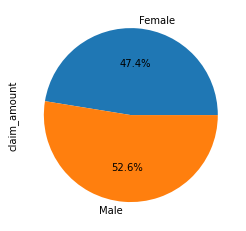

In [46]:
#df_gender.plot.pie(y='claim_amount', figsize = (8,8))
df_gender.claim_amount.plot(kind = 'pie', autopct='%1.1f%%')

In [47]:
df_segment = df.groupby('Segment').sum().drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age'], axis=1)

In [48]:
df_segment

,claim_amount
Segment,
Gold,4.732087e+06
Platinum,4.464932e+06
Silver,4.244503e+06


<AxesSubplot:ylabel='claim_amount'>

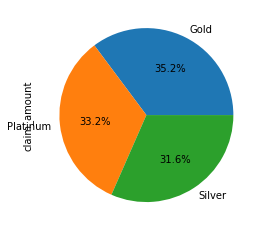

In [49]:
df_segment.claim_amount.plot(kind = 'pie', autopct='%1.1f%%')

### 12. Which gender claimed the most for driver related issues? use bar plot

In [50]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1,37.610959,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,1,35.471233,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,1,44.443836,Adult


In [51]:
df_driver_related = df[(df['incident_cause']=='Driver error') | (df['incident_cause']=='Other driver error')]

In [52]:
df_driver_related1 = df_driver_related.groupby(['gender','incident_cause']).sum()\
.drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age'],axis=1)\
.reset_index().groupby('gender').sum()

In [53]:
df_driver_related2 = df_driver_related1.reset_index()

In [54]:
df_driver_related2

,gender,claim_amount
0,Female,3.137396e+06
1,Male,3.938469e+06


<AxesSubplot:xlabel='gender'>

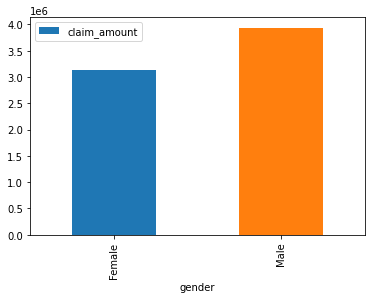

In [55]:
df_driver_related2.plot.bar(x='gender', y = 'claim_amount')

### Males have claimed the most for driver related issues

## 13. Which age group has the maximum fraudulant policy claims?

In [56]:
df.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult


In [57]:
df['fraudulent'].value_counts()

No     839
Yes    254
Name: fraudulent, dtype: int64

In [58]:
df_fraud = df[['fraudulent','Age Group']]

In [59]:
df_fraud = df_fraud[df_fraud['fraudulent']=='Yes']

In [60]:
df_fraud = df_fraud.groupby(['Age Group']).count().reset_index()

In [61]:
df_fraud

,Age Group,fraudulent
0,Adult,187
1,Children,7
2,Senior,12
3,Youth,48


<AxesSubplot:xlabel='Age Group'>

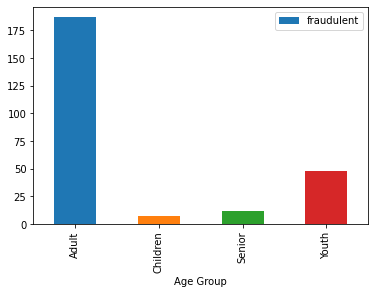

In [62]:
df_fraud.plot.bar(x='Age Group', y = 'fraudulent')

### Adult age group has the maximum fraudulant policy claims

## 14. Monthly trend of total amount claimed by customers

In [63]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1,37.610959,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,1,35.471233,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,1,44.443836,Adult


In [64]:
df['claim_month'] = pd.DatetimeIndex(df['claim_date']).month

In [65]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group,claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult,10
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1,37.610959,Adult,2
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,1,35.471233,Adult,6
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,1,44.443836,Adult,1


In [66]:
df_claim = df[['claim_month','claim_amount']]

In [67]:
df_claim.head()

,claim_month,claim_amount
0,11,2980.0
1,10,2980.0
2,2,3369.5
3,6,1680.0
4,1,2680.0


In [68]:
monthly_claims = df_claim.groupby('claim_month').sum()

In [69]:
monthly_claims

,claim_amount
claim_month,
1,1.331832e+06
2,1.156579e+06
3,1.348315e+06
4,1.276020e+06
5,1.115035e+06
6,1.317728e+06
7,1.382493e+06
8,9.134147e+05
9,9.803903e+05


<AxesSubplot:xlabel='claim_month'>

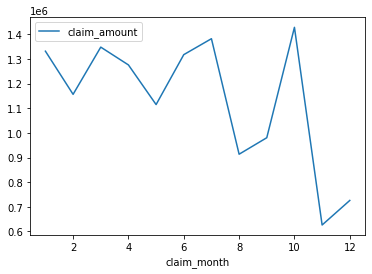

In [70]:
monthly_claims.plot(y = 'claim_amount', use_index = True)

## 15. Average claim amount for gender and age categories

In [71]:
df.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,isReported?,Age,Age Group,claim_month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,1,42.775342,Adult,11
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,1,51.778082,Adult,10
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,1,37.610959,Adult,2
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,1,35.471233,Adult,6
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,1977-05-13,NV,956-871-8691,Gold,1,44.443836,Adult,1


In [82]:
gender_claims = df.groupby(['fraudulent','gender']).mean().drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age','claim_month'], axis=1).reset_index()

In [83]:
gender_claims

,fraudulent,gender,claim_amount
0,No,Female,12424.388568
1,No,Male,12191.830435
2,Yes,Female,11070.621202
3,Yes,Male,15057.496611


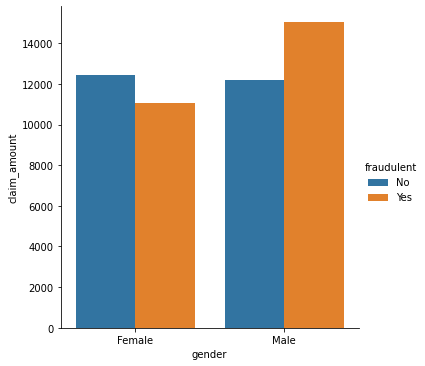

In [93]:
sns.catplot(x='gender', y='claim_amount', hue='fraudulent',kind='bar', data = gender_claims)

In [86]:
age_claims = df.groupby(['fraudulent','Age Group']).mean().drop(['claim_id','customer_id','total_policy_claims','CUST_ID','isReported?','Age','claim_month'], axis=1).reset_index()

In [87]:
age_claims

,fraudulent,Age Group,claim_amount
0,No,Adult,12080.974083
1,No,Children,10866.250000
2,No,Senior,12884.961020
3,No,Youth,12912.920627
4,Yes,Adult,14208.997318
5,Yes,Children,10519.214286
6,Yes,Senior,10349.041667
7,Yes,Youth,9074.674226


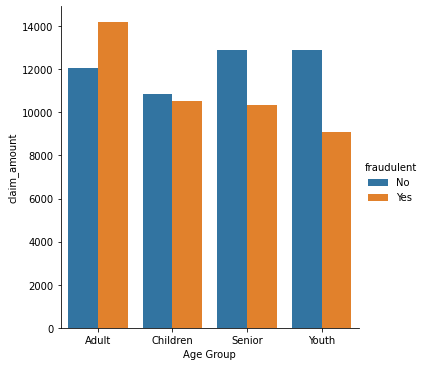

In [95]:
sns.catplot(x='Age Group', y='claim_amount', hue='fraudulent',kind='bar', data = age_claims)